In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [9]:
df= pd.read_csv('Cars Datasets 2025.csv',encoding='unicode_escape')
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [10]:
df['Cars Prices'] = df['Cars Prices'].str.replace(r'[\$,]', '', regex=True)
df['Cars Prices'] = df['Cars Prices'].str.split('-').str[0]
df['Cars Prices'] = pd.to_numeric(df['Cars Prices'], errors='coerce')



In [11]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le


In [12]:
X = df.drop("Fuel Types", axis=1)  # Example target: Fuel Types
y = df["Fuel Types"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [15]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.819672131147541
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.68      0.77      0.72        22
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.74      0.94      0.83        18
           6       0.44      0.62      0.52        13
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.93      0.91      0.92       171
          15       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          18       0.50      0.33      0.40         3
          20       0.33      0.20      0.25         5
          21       0.00      0.00      

c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: 

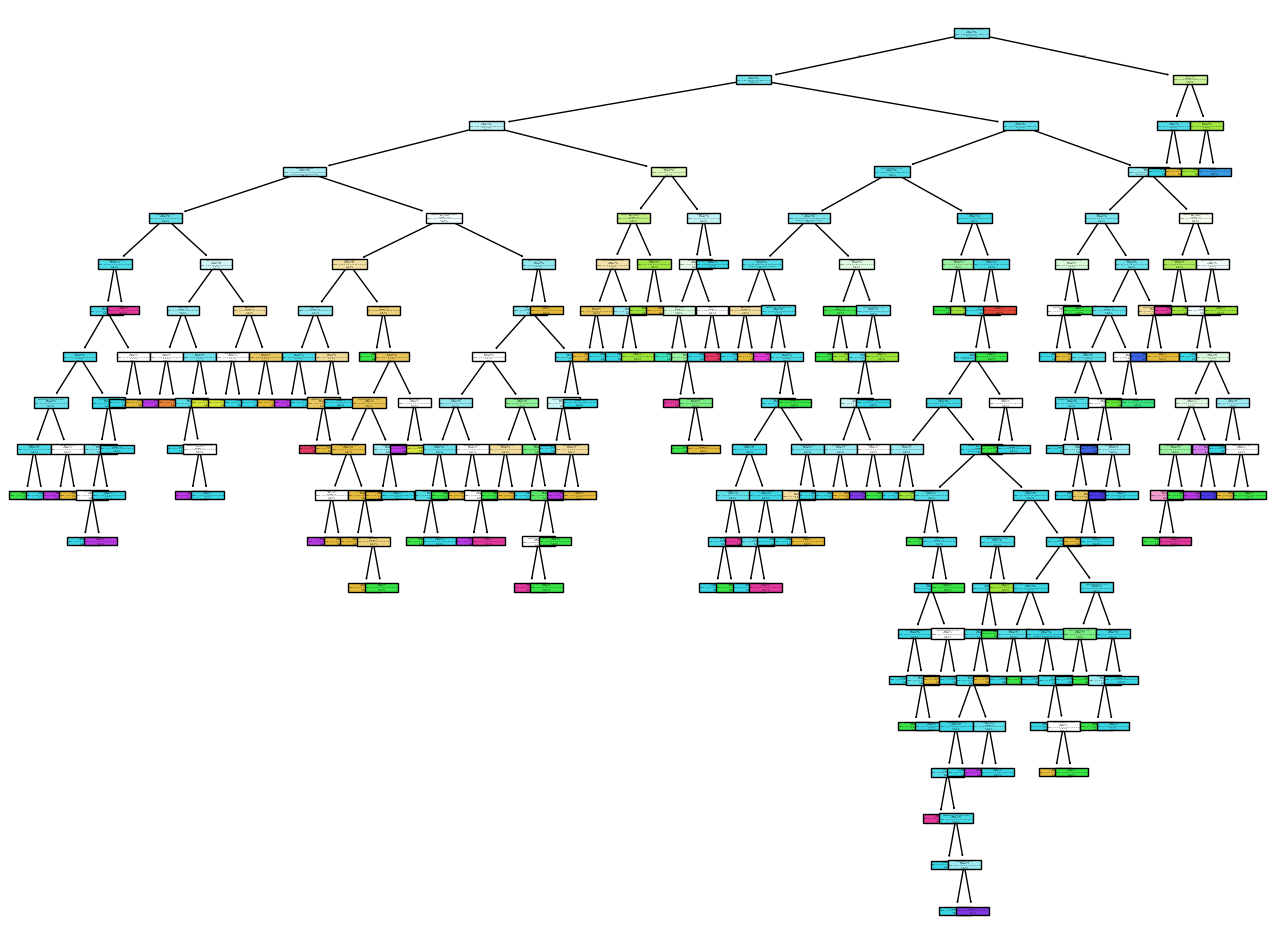

In [17]:
plt.figure(figsize=(16,12))
plot_tree(dt, feature_names=X.columns, class_names=[str(c) for c in np.unique(y)], filled=True)
plt.show()

In [18]:
dt_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_limited.fit(X_train, y_train)
y_pred_limited = dt_limited.predict(X_test)
print("Decision Tree (max_depth=3) Accuracy:", accuracy_score(y_test, y_pred_limited))

Decision Tree (max_depth=3) Accuracy: 0.7704918032786885


In [20]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



Random Forest Accuracy: 0.8811475409836066
              precision    recall  f1-score   support

           1       0.82      0.82      0.82        22
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.95      1.00      0.97        18
           6       0.57      0.62      0.59        13
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         1
          13       0.91      0.99      0.95       171
          18       0.50      0.33      0.40         3
          20       0.00      0.00      0.00         5
          21       0.00      0.00      0.00         2

    accuracy                           0.88       244
   macro avg       0.34      0.34      0.34       244
weighted avg       0.82      0.88    

c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


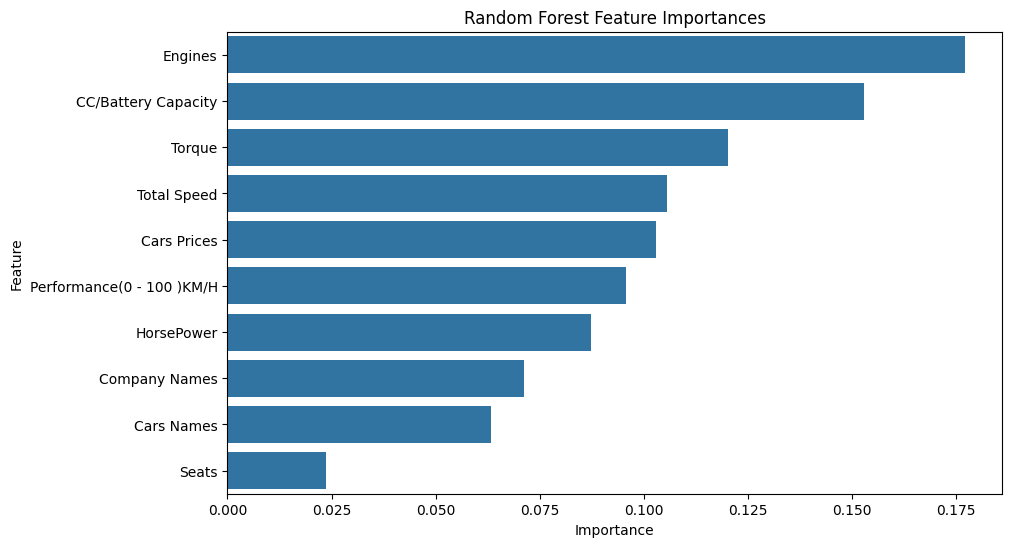

In [21]:
importances = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})
importances = importances.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=importances)
plt.title("Random Forest Feature Importances")
plt.show()

In [22]:
cv_scores_dt = cross_val_score(dt, X, y, cv=5)
cv_scores_rf = cross_val_score(rf, X, y, cv=5)

print("Decision Tree CV Accuracy:", cv_scores_dt.mean())
print("Random Forest CV Accuracy:", cv_scores_rf.mean())

c:\Python313\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Python313\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Decision Tree CV Accuracy: 0.5658773527625987
Random Forest CV Accuracy: 0.754658301288538
